In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.optimize import curve_fit

In [2]:
from utils.layers import filter_creation

In [3]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# colors = ['#EFB475', '#477081', '#AEC5FB', '#F77B7F']
colors = ['#EFB475', '#477081', '#F0F3FC', '#F77B7F']
cmap = ListedColormap(colors)
bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)

In [4]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [11]:
filtro = filter_creation(tamanho_rede = 120,
                porosidade = 0.63,
                camadas = 6,
                diametro_fibra = 2,
                concentracao_cbm = 0.3,
                tamanho_cbm = 1,
                CBM=True,
                display=False)[0]

Filtro criado, 0.58


In [7]:
def calcular_energia(rede):
    energia = 0
    tamanho = len(rede)
    for i in range(tamanho):
        for j in range(tamanho):
            S = rede[i, j]
            if S == 0:
                continue

            # Interacao Vizinhos
            vizinhos = [
                rede[(i+1) % tamanho, j],
                rede[i, (j+1) % tamanho],
                rede[(i-1) % tamanho, j],
                rede[i, (j-1) % tamanho]
            ]

            
            for V in vizinhos:
                if S == 1:  # CBM
                    if V == -1:  # CBM com MP
                        energia += E_CBMP
                    # elif V == 2:  # CBM com espid
                    #     energia += E_CBMS
                    # elif V == 1:  # CBM com CBM
                    #     energia += E_CBMCBM
                elif S == 2:  # Espid
                    if V == -1:  # Espid com MP
                        energia += E_SMP
                #     elif V == 2:  # Espid com espid
                #         energia += E_SS
                # elif S == -1:  # MP
                #     if V == -1:  # MP com MP
                #         energia += E_MPMP
    
    # return energia/(len(rede)**2)
    return energia/2

In [14]:
def monte_carlo(rede, mps_count, passos, T, tamanho_limite_mp=50):
    
    tamanho = len(rede)
    mps_size = []
    
    for passo in range(passos):
        
        # Posicao aleatoria na rede
        i = np.random.randint(0, tamanho)
        j = np.random.randint(0, tamanho)
        # tamanho_mp = np.random.randint(0, tamanho_limite_mp)
        tamanho_mp = tamanho_limite_mp
        S = rede[i, j]
        
        rede_teste = rede.copy()

        kB=1
        beta = kB*T

        # Boundary
        if i+tamanho_mp < tamanho and j+tamanho_mp < tamanho:
            
            rede_teste[i:i+tamanho_mp,j:j+tamanho_mp] = 1

            energia_atual = calcular_energia(rede)
            energia_teste = calcular_energia(rede_teste)
            
            energia_atual = np.exp(-beta*(-energia_atual))
            energia_teste = np.exp(-beta*(-energia_teste))

            # delta_energia = energia_teste - energia_atual
            # if np.random.rand() >= np.exp(-delta_energia / T):
            # print(delta_energia,np.exp(-delta_energia/T))

            # ALGORITMO DE METROPOLES
            # EXISTE CHANCE DE MANTER O SISTEMA
            # MESMO QUE A ENERGIA NÃO FOR MENOR

            if energia_teste > energia_atual:
                rede[i:i+tamanho_mp,j+j:tamanho_mp] = S
            elif np.random.random() < 0.3:
                rede[i:i+tamanho_mp,j+j:tamanho_mp] = S
            else:
                mps_count += 1
                mps_size.append(tamanho_mp)
                rede = rede_teste
    
    return rede,mps_count,mps_size

In [9]:
E_CBMP = -0.69
E_CBMS = -0.1
E_SMP = -0.24
E_CBMCBM = -0.1
E_SS = -0.1
E_MPMP = -0.1

In [231]:
it = 2000
e_config = {}
energias,mps_list,mps_size_list = [],[],[]

for n in range(it):

    camada = filter_creation(tamanho_rede = 120,
                porosidade = 0.63,
                camadas = 6,
                diametro_fibra = 2,
                concentracao_cbm = 0.3,
                tamanho_cbm = 1,
                CBM=True,
                display=False)[0]

    mps_count = 0

    rede,mps_count,mps_size = monte_carlo(camada, mps_count, passos=50, tamanho_limite_mp=12, T=300)
    energia_atual = calcular_energia(rede)

    mps_size_list.append(mps_size)

    energias.append(energia_atual)
    mps_list.append(mps_count)

    e_config.update({n:[energia_atual,rede]})

Filtro criado, 0.74
Filtro criado, 0.65
Filtro criado, 1.4
Filtro criado, 1.09
Filtro criado, 1.14
Filtro criado, 0.78
Filtro criado, 0.72
Filtro criado, 0.71
Filtro criado, 0.8
Filtro criado, 0.65
Filtro criado, 0.74
Filtro criado, 1.23
Filtro criado, 1.28
Filtro criado, 1.0
Filtro criado, 0.68
Filtro criado, 0.8
Filtro criado, 0.68
Filtro criado, 0.82
Filtro criado, 0.8
Filtro criado, 0.7
Filtro criado, 0.74
Filtro criado, 0.85
Filtro criado, 0.75
Filtro criado, 0.83
Filtro criado, 0.74
Filtro criado, 0.68
Filtro criado, 0.68
Filtro criado, 0.6
Filtro criado, 0.68
Filtro criado, 0.64
Filtro criado, 0.64
Filtro criado, 0.77
Filtro criado, 0.71
Filtro criado, 0.87
Filtro criado, 0.61
Filtro criado, 0.69
Filtro criado, 0.65
Filtro criado, 0.62
Filtro criado, 0.79
Filtro criado, 0.68
Filtro criado, 1.69
Filtro criado, 1.58
Filtro criado, 1.56
Filtro criado, 1.48
Filtro criado, 1.54
Filtro criado, 1.58
Filtro criado, 1.6
Filtro criado, 1.54
Filtro criado, 1.5
Filtro criado, 1.51
Filtro cr

Traceback (most recent call last):
  File "c:\venv\ilumpy\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\pedro220068\AppData\Local\Temp\ipykernel_25108\3579697957.py", line 19, in <module>
    energia_atual = calcular_energia(rede)
  File "C:\Users\pedro220068\AppData\Local\Temp\ipykernel_25108\1641905252.py", line -1, in calcular_energia
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\venv\ilumpy\lib\site-packages\IPython\core\interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\venv\ilumpy\lib\site-packages\IPython\core\ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\venv\ilumpy\lib\site-packages\IPython\core\ultratb.py", line 1006, in structured_traceback
    return VerboseTB.structured_

C:\Users\pedro220068\AppData\Local\Temp\ipykernel_25108\2637495151.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_plot, gaussian(x_plot, *popt), 'r-', label='Gaussian Fit',color='#E0218A')


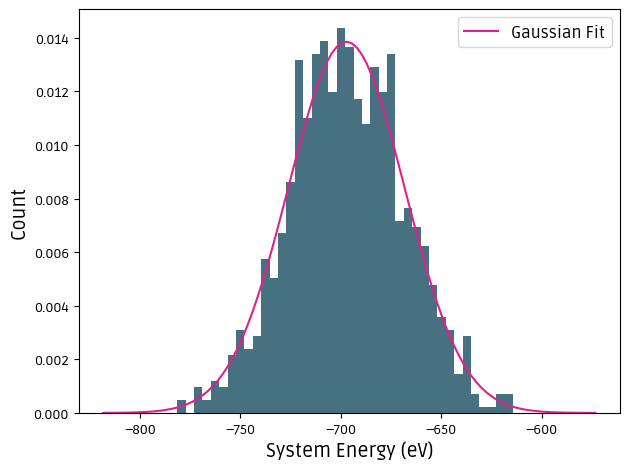

In [ ]:
count, bins, _ = plt.hist(energias,density=True,bins=40,color='#477081')
bin_centers = 0.5 * (bins[1:] + bins[:-1])

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

popt, pcov = curve_fit(gaussian, bin_centers, count, p0=[1., np.mean(energias), np.std(energias)])

x_plot = np.linspace(min(bin_centers)*1.05,max(bin_centers)*0.93,100)
plt.plot(x_plot, gaussian(x_plot, *popt), 'r-', label='Gaussian Fit',color='#E0218A')

plt.legend(fontsize=12)
plt.xlabel('System Energy (eV)',fontsize=14),plt.ylabel('Count',fontsize=14)

plt.tight_layout()
plt.savefig('results/MC_sim.png',dpi=800,transparent=True)

plt.show()

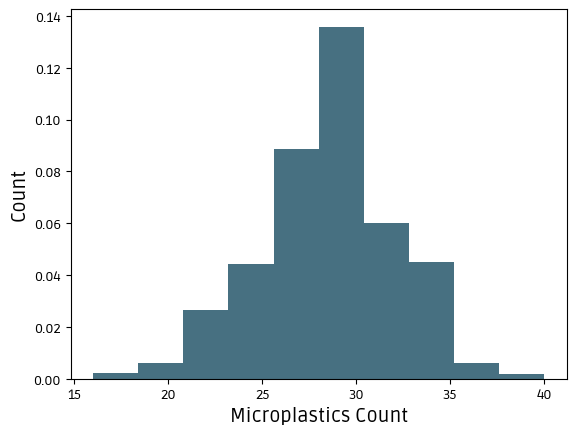

In [220]:
plt.hist(mps_list,color='#477081',density=True)
plt.xlabel('Microplastics Count',fontsize=14),plt.ylabel('Count',fontsize=14)
plt.savefig('results/MC_sim_MPs.png',dpi=800,transparent=True)

plt.show()

In [152]:
mps_size_e = {}
for e,mp in zip(energias,mps_list):
    if mp not in mps_size_e:
        mps_size_e[mp] = [e]
    else:
        mps_size_e[mp].append(e)

In [219]:
kB = 8.617333e-5
T = 297.15
beta = kB*T

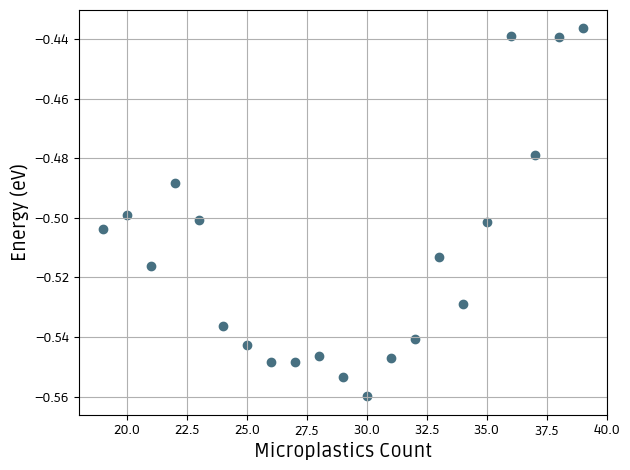

In [229]:
mu = 2.6e20*1e-21

for k,v in mps_size_e.items():

    partition_function = 0
    for v_i in v:
        partition_function += np.exp(-beta*(v_i))
    
    F = -beta*np.log(partition_function - mu*k)
    plt.scatter(k,F,color='#477081')

    # plt.errorbar(k,np.mean(v),yerr=np.std(v),capsize=3,fmt="r--o",color='#477081',ecolor = "black")

# plt.ylim(-780,-625)
plt.xlabel('Microplastics Count',fontsize=14)
plt.ylabel('Helmholtz Free Energy (eV)',fontsize=14)
plt.grid()
plt.tight_layout()

# plt.savefig('results/mps_energy.png',dpi=600,transparent=True)
plt.show()

In [130]:
rede = e_config[17][1]

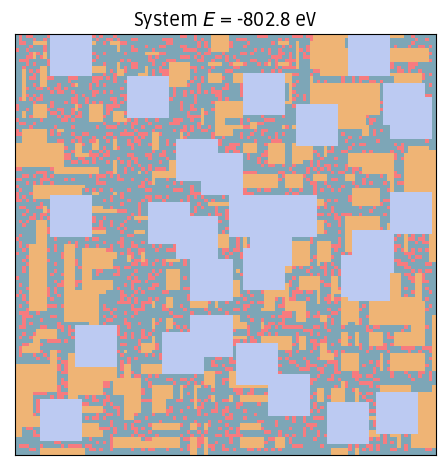

In [133]:
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = ['#7DA6B7', '#EFB475', '#BCCAF2', '#F77B7F']

cmap = ListedColormap(colors)
bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)
cmap.set_bad(color='#acbdef')

rede = np.where(rede == -2, np.nan, rede)

cax = plt.imshow(rede, cmap=cmap, norm=norm)
# cbar = plt.colorbar(cax, ticks=[-1,0,1,2])
# cbar.set_ticklabels(['Fiber', 'Pore', 'Microplastic', 'BARBIE1'])

plt.title(f'Energy = -802.8 eV, MPs count = ',fontsize=14)

plt.xticks([])
plt.yticks([])

plt.savefig('results/800ev.png',dpi=600,transparent=True)

plt.tight_layout()

In [119]:
# 10 (-702), 15 (-651.8), 17 (-802)

for i,val in enumerate(e_config.values()):
    print(i,val[0])

0 -715.9800000000258
1 -696.4350000000254
2 -663.4350000000256
3 -710.6850000000275
4 -714.4200000000261
5 -676.860000000024
6 -659.7450000000244
7 -684.240000000025
8 -715.5450000000274
9 -687.510000000027
10 -702.8700000000274
11 -668.3850000000252
12 -695.7450000000263
13 -702.2250000000266
14 -688.2000000000269
15 -651.8400000000236
16 -705.5250000000253
17 -802.8000000000306
18 -706.020000000027
19 -703.6950000000244
20 -719.8350000000256
21 -713.8800000000257
22 -695.9400000000255
23 -761.2650000000292
24 -673.5600000000244
25 -753.7050000000291
26 -732.8100000000296
27 -697.3350000000266
28 -675.2700000000236
29 -697.9200000000268
30 -704.4600000000266
31 -702.300000000025
32 -678.8250000000253
33 -689.2350000000265
34 -684.4500000000266
35 -671.8050000000243
36 -713.5200000000261
37 -696.0450000000258
38 -699.0600000000254
39 -683.9100000000248
40 -690.1350000000259
41 -653.4300000000234
42 -684.2700000000241
43 -666.1650000000229
44 -697.2150000000258
45 -661.7400000000225
46 

In [218]:
bins_dic = {}
for i in range(1,len(bins)):
    bins_dic[f'{round(bins[i-1],4)} - {round(bins[i],4)}'] = []

for ec in e_config.values():
    for k in bins_dic.keys():
        splitted = k.split(' - ')
        min_lim = float(splitted[0]) 
        max_lim = float(splitted[1])
        if ec[0] >= min_lim and ec[0] <= max_lim:
            bins_dic[k].append(ec[1])

def calculate_rmsd(A, B):
    dif = A - B
    rmsd = np.sqrt(np.mean(np.sum(dif**2, axis=1)))
    return rmsd

rmsd_vals = []

for k,v in bins_dic.items():
    
    rmsd_results = []
    matrices = v.copy()

    for (i, j) in combinations(range(len(matrices)), 2):
        rmsd = calculate_rmsd(matrices[i], matrices[j])
        rmsd_results.append(rmsd)
    
    if len(rmsd_results) > 0:
        # rmsd_vals.append(np.mean(rmsd_results))
        rmsd_vals.append(rmsd_results)
    else:
        rmsd_vals.append(0)

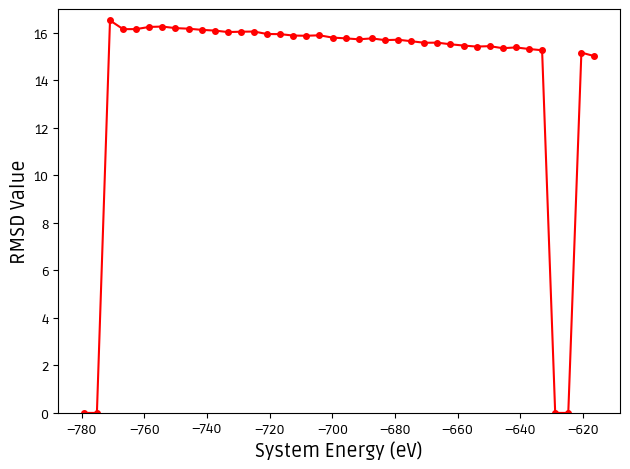

In [198]:
plt.plot(bin_centers,rmsd_vals,marker='o',markersize=4,color='red',label='Configurations RMSD Average')

plt.xlabel('System Energy (eV)',fontsize=14)
plt.ylabel('RMSD Value',fontsize=14)

# plt.xlim(-790,-640)
plt.ylim(0,17)

plt.tight_layout()
plt.savefig('results/rmsd.png',dpi=700,transparent=True)
plt.show()